# Libraries and Dataset Loading
We import Python libraries for data handling, text processing, and NLP tasks:
- `pandas` for CSV handling.
- `re` for regex-based text cleaning.
- `nltk` for tokenization and stopwords removal.

We also download NLTK resources and load the trivia dataset into a DataFrame.


In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
df = pd.read_csv('/content/trivia_questions.csv')
df.head()

,Question,Answer
0,It is alleged that this country 'sold out' to ...,Peru
1,What two teams took part in the 1970 European ...,Glasgow Celtic and Feyenoord
2,Where did Roberto Carlos of Brazil begin his c...,Union San Juan de Araras
3,How many countries participated in the 1954 Wo...,16
4,The first International match was played betwe...,England and Scotland


# Text Cleaning
Define `clean_text` function to remove noise from questions and answers:
- URLs, emails, long numbers.
- Non-alphanumeric characters (keeping punctuation).
- Extra newlines and whitespace.

Apply it to all questions and answers.


In [3]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", str(text))  # remove links
    text = re.sub(r"\S+@\S+", "", text)              # remove emails
    text = re.sub(r"\d{10,}", "", text)              # remove long numbers
    text = re.sub(r"[^a-zA-Z0-9.,?!\s]", "", text)   # keep only text & punctuation
    text = re.sub(r"\n+", " ", text)                 # remove newlines
    return text.strip()

In [4]:
df["Question"] = df["Question"].apply(clean_text)
df["Answer"]   = df["Answer"].apply(clean_text)

df.head()

,Question,Answer
0,It is alleged that this country sold out to Ar...,Peru
1,What two teams took part in the 1970 European ...,Glasgow Celtic and Feyenoord
2,Where did Roberto Carlos of Brazil begin his c...,Union San Juan de Araras
3,How many countries participated in the 1954 Wo...,16
4,The first International match was played betwe...,England and Scotland


# Exploratory Data Analysis
- Calculate the number of words in each question (`q_len`) and answer (`a_len`).
- Visualize their distribution with histograms to understand text lengths in the dataset.


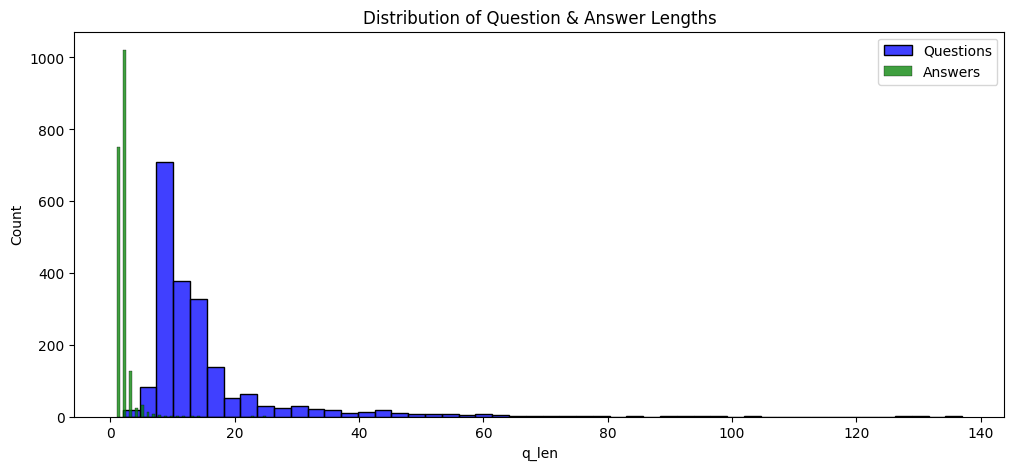

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df["q_len"] = df["Question"].apply(lambda x: len(str(x).split()))
df["a_len"] = df["Answer"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12,5))
sns.histplot(df["q_len"], bins=50, color="blue", label="Questions")
sns.histplot(df["a_len"], bins=50, color="green", label="Answers")
plt.legend()
plt.title("Distribution of Question & Answer Lengths")
plt.show()

# Word Clouds
- Combine all questions (and separately answers) into one text string.
- Generate WordClouds to visualize the most frequent words in the dataset.


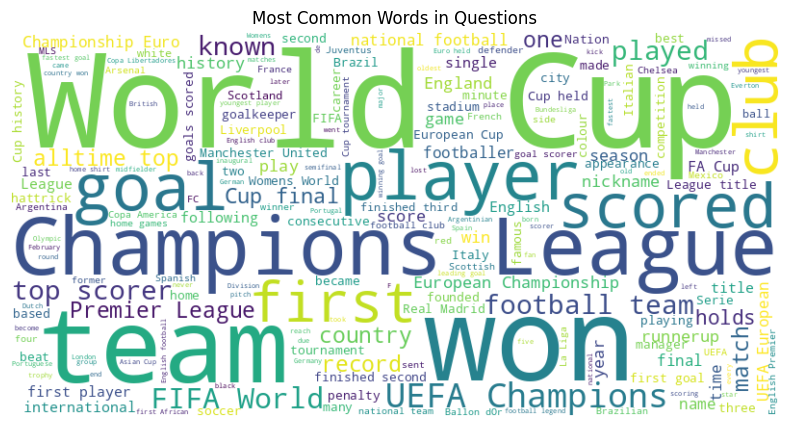

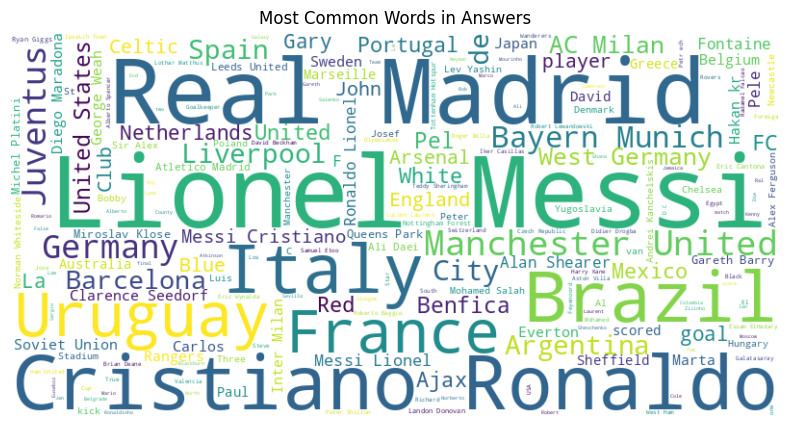

In [6]:
from wordcloud import WordCloud

q_text = " ".join(df["Question"].astype(str))
q_wc = WordCloud(width=800, height=400, background_color="white").generate(q_text)

plt.figure(figsize=(10,5))
plt.imshow(q_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Questions")
plt.show()

a_text = " ".join(df["Answer"].astype(str))
a_wc = WordCloud(width=800, height=400, background_color="white").generate(a_text)

plt.figure(figsize=(10,5))
plt.imshow(a_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Answers")
plt.show()


# Stopwords Removal
Stopwords (e.g., "the", "is") add little meaning.  
We remove them from questions and answers to create `Question_clean` and `Answer_clean`.
This improves text quality for analysis and model training.


In [7]:
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = nltk.word_tokenize(str(text))
    filtered = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered)

df["Question_clean"] = df["Question"].apply(remove_stopwords)
df["Answer_clean"]   = df["Answer"].apply(remove_stopwords)

df[["Question", "Question_clean", "Answer_clean"]].head()


,Question,Question_clean,Answer_clean
0,It is alleged that this country sold out to Ar...,alleged country sold Argentina 1978 World Cup ...,Peru
1,What two teams took part in the 1970 European ...,two teams took part 1970 European Cup Finals ?,Glasgow Celtic Feyenoord
2,Where did Roberto Carlos of Brazil begin his c...,Roberto Carlos Brazil begin career ?,Union San Juan de Araras
3,How many countries participated in the 1954 Wo...,many countries participated 1954 World Cup ?,16
4,The first International match was played betwe...,first International match played two teams ?,England Scotland


# Word Frequency Analysis
Count the top 20 most frequent words in cleaned questions and answers.
This gives insight into common vocabulary and dataset patterns.


In [8]:
from collections import Counter

q_words = " ".join(df["Question_clean"]).split()
q_freq = Counter(q_words).most_common(20)

a_words = " ".join(df["Answer_clean"]).split()
a_freq = Counter(a_words).most_common(20)

print("Top 20 Words in Questions:", q_freq)
print("Top 20 Words in Answers:", a_freq)


Top 20 Words in Questions: [('?', 1917), (',', 640), ('Cup', 537), ('.', 421), ('World', 392), ('League', 384), ('team', 314), ('first', 259), ('UEFA', 246), ('Champions', 234), ('player', 233), ('scored', 228), ('football', 213), ('goal', 167), ('club', 158), ('FIFA', 151), ('European', 148), ('scorer', 148), ('top', 141), ('goals', 140)]
Top 20 Words in Answers: [('United', 53), ('Lionel', 41), ('Messi', 41), ('Madrid', 41), ('Ronaldo', 33), ('Real', 33), ('Germany', 32), ('Cristiano', 30), ('Brazil', 26), ('Manchester', 25), ('Italy', 23), ('Milan', 23), ('Uruguay', 22), ('France', 21), ('Juventus', 19), ('City', 19), (',', 18), ('Bayern', 18), ('Munich', 18), ('West', 18)]


In [9]:
print("Average Question Length:", df["q_len"].mean())
print("Average Answer Length:", df["a_len"].mean())
print("Max Question Length:", df["q_len"].max())
print("Max Answer Length:", df["a_len"].max())

Average Question Length: 15.041562343515272
Average Answer Length: 1.9108662994491739
Max Question Length: 137
Max Answer Length: 25


In [10]:
# Run in a notebook cell (Colab / local). If you already have these installed, skip.
!pip install -q transformers datasets accelerate sentencepiece peft evaluate rouge_score sentence-transformers

# (Optional) If you want bitsandbytes/4-bit later for other models:
!pip install -q bitsandbytes


In [11]:
import os, random
import pandas as pd
import numpy as np
import torch

print("torch", torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)


torch 2.8.0+cu126
Device: cuda


In [12]:
DATA_PATH = "/content/trivia_questions.csv"
df = pd.read_csv(DATA_PATH)

df = df.rename(columns={col: col.strip() for col in df.columns})
assert "Question" in df.columns and "Answer" in df.columns, "Make sure CSV has columns 'Question' and 'Answer'"

df = df.dropna(subset=["Question", "Answer"]).drop_duplicates(subset=["Question","Answer"]).reset_index(drop=True)
print("Rows after cleaning:", len(df))
df.head(6)


Rows after cleaning: 1969


,Question,Answer
0,It is alleged that this country 'sold out' to ...,Peru
1,What two teams took part in the 1970 European ...,Glasgow Celtic and Feyenoord
2,Where did Roberto Carlos of Brazil begin his c...,Union San Juan de Araras
3,How many countries participated in the 1954 Wo...,16
4,The first International match was played betwe...,England and Scotland
5,How many matches were played in the 1998 World...,64


# Dataset Preparation for Model
- Remove missing and duplicate entries.
- Convert DataFrame to HuggingFace `Dataset`.
- Split into train (80%), validation (10%), and test (10%) sets.
This prepares the data for sequence-to-sequence model training.


In [13]:
from datasets import Dataset, DatasetDict

dataset = Dataset.from_pandas(df[["Question","Answer"]])

split1 = dataset.train_test_split(test_size=0.2, seed=42)
test_valid = split1["test"].train_test_split(test_size=0.5, seed=42)

ds = DatasetDict({
    "train": split1["train"],
    "validation": test_valid["train"],
    "test": test_valid["test"]
})
print(ds)


DatasetDict({
    train: Dataset({
        features: ['Question', 'Answer'],
        num_rows: 1575
    })
    validation: Dataset({
        features: ['Question', 'Answer'],
        num_rows: 197
    })
    test: Dataset({
        features: ['Question', 'Answer'],
        num_rows: 197
    })
})


# Tokenization
- Load `Flan-T5-base` model and tokenizer.
- Convert text into input IDs the model can understand.
- `preprocess_batch` truncates/pads sequences and prepares labels for training.


In [14]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments
from datasets import DatasetDict

model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")

max_input_length = 128
max_target_length = 64

def preprocess_batch(examples):
    inputs = [f"question: {q}" for q in examples["Question"]]
    model_inputs = tokenizer(
        inputs,
        max_length=max_input_length,
        padding="max_length",
        truncation=True
    )

    labels = tokenizer(
        examples["Answer"],
        max_length=max_target_length,
        padding="max_length",
        truncation=True
    )
    label_ids = labels["input_ids"]

    label_ids = [
        [(token if token != tokenizer.pad_token_id else -100) for token in lab]
        for lab in label_ids
    ]
    model_inputs["labels"] = label_ids

    return model_inputs

tokenized = ds.map(preprocess_batch, batched=True, remove_columns=ds["train"].column_names)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/1575 [00:00<?, ? examples/s]

Map:   0%|          | 0/197 [00:00<?, ? examples/s]

Map:   0%|          | 0/197 [00:00<?, ? examples/s]

# LoRA Fine-Tuning
- Apply Low-Rank Adaptation (LoRA) to efficiently fine-tune the model.
- Only updates certain attention layers (`q` and `v`) instead of full model.
- Reduces memory usage and training time.


In [15]:
from transformers import AutoModelForSeq2SeqLM
from peft import LoraConfig, get_peft_model, TaskType
import torch

MODEL_NAME = "google/flan-t5-base"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)
model = model.to(device)

peft_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    inference_mode=False,
    r=8,
    lora_alpha=16,
    lora_dropout=0.1,
    target_modules=["q", "v"]
)

model = get_peft_model(model, peft_config)

print("PEFT/LoRA modules attached. Trainable params (approx):")
for n, p in model.named_parameters():
    if p.requires_grad:
        print(n, p.numel())

PEFT/LoRA modules attached. Trainable params (approx):
base_model.model.encoder.block.0.layer.0.SelfAttention.q.lora_A.default.weight 6144
base_model.model.encoder.block.0.layer.0.SelfAttention.q.lora_B.default.weight 6144
base_model.model.encoder.block.0.layer.0.SelfAttention.v.lora_A.default.weight 6144
base_model.model.encoder.block.0.layer.0.SelfAttention.v.lora_B.default.weight 6144
base_model.model.encoder.block.1.layer.0.SelfAttention.q.lora_A.default.weight 6144
base_model.model.encoder.block.1.layer.0.SelfAttention.q.lora_B.default.weight 6144
base_model.model.encoder.block.1.layer.0.SelfAttention.v.lora_A.default.weight 6144
base_model.model.encoder.block.1.layer.0.SelfAttention.v.lora_B.default.weight 6144
base_model.model.encoder.block.2.layer.0.SelfAttention.q.lora_A.default.weight 6144
base_model.model.encoder.block.2.layer.0.SelfAttention.q.lora_B.default.weight 6144
base_model.model.encoder.block.2.layer.0.SelfAttention.v.lora_A.default.weight 6144
base_model.model.enco

In [16]:
def count_params(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total params: {total:,}")
    print(f"Trainable params: {trainable:,} ({trainable/total*100:.4f}% of total)")
    return total, trainable

count_params(model)


Total params: 248,462,592
Trainable params: 884,736 (0.3561% of total)


(248462592, 884736)

In [17]:
pip install --upgrade transformers datasets accelerate peft

In [18]:
import transformers, inspect, sys
print("python:", sys.version.splitlines()[0])
print("transformers:", transformers.__version__)

from transformers import Seq2SeqTrainingArguments
sig = inspect.signature(Seq2SeqTrainingArguments.__init__)
print("\nSeq2SeqTrainingArguments.__init__ accepts these params:\n")
print(list(sig.parameters.keys()))


python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
transformers: 4.56.1

Seq2SeqTrainingArguments.__init__ accepts these params:

['self', 'output_dir', 'overwrite_output_dir', 'do_train', 'do_eval', 'do_predict', 'eval_strategy', 'prediction_loss_only', 'per_device_train_batch_size', 'per_device_eval_batch_size', 'per_gpu_train_batch_size', 'per_gpu_eval_batch_size', 'gradient_accumulation_steps', 'eval_accumulation_steps', 'eval_delay', 'torch_empty_cache_steps', 'learning_rate', 'weight_decay', 'adam_beta1', 'adam_beta2', 'adam_epsilon', 'max_grad_norm', 'num_train_epochs', 'max_steps', 'lr_scheduler_type', 'lr_scheduler_kwargs', 'warmup_ratio', 'warmup_steps', 'log_level', 'log_level_replica', 'log_on_each_node', 'logging_dir', 'logging_strategy', 'logging_first_step', 'logging_steps', 'logging_nan_inf_filter', 'save_strategy', 'save_steps', 'save_total_limit', 'save_safetensors', 'save_on_each_node', 'save_only_model', 'restore_callback_states_from_checkpoint', 'no_cuda', 

In [19]:
import torch
print(torch.cuda.is_available())
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))


True
Tesla T4


# Training Setup
- Configure `Seq2SeqTrainingArguments` for batch size, learning rate, epochs, logging, and evaluation steps.
- Use `Seq2SeqTrainer` to train the LoRA-adapted model with the tokenized dataset.


In [20]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
import torch
from transformers import Seq2SeqTrainingArguments

output_dir = "./football_t5_lora"

training_args = Seq2SeqTrainingArguments(
    output_dir="./football_t5_lora",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=4,
    num_train_epochs=5,
    learning_rate=3e-4,
    weight_decay=0.01,
    fp16=True,
    report_to="none",
    logging_strategy="steps",
    logging_steps=100,
    save_strategy="steps",
    save_steps=500,
    save_total_limit=2,
    eval_strategy="steps",
    eval_steps=500,
    predict_with_generate=True,
    load_best_model_at_end=True,
    metric_for_best_model="loss",
    greater_is_better=False,
)


data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized["train"],
    eval_dataset=tokenized["validation"],
    processing_class=tokenizer,
)

trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=495, training_loss=0.0, metrics={'train_runtime': 378.4269, 'train_samples_per_second': 20.81, 'train_steps_per_second': 1.308, 'total_flos': 1353466920960000.0, 'train_loss': 0.0, 'epoch': 5.0})

# Model Saving and Loading
- Save fine-tuned model and tokenizer locally.
- Reload the model for inference without retraining.


In [21]:
trainer.save_model("./football_t5_lora_final")
tokenizer.save_pretrained("./football_t5_lora_final")

('./football_t5_lora_final/tokenizer_config.json',
 './football_t5_lora_final/special_tokens_map.json',
 './football_t5_lora_final/spiece.model',
 './football_t5_lora_final/added_tokens.json',
 './football_t5_lora_final/tokenizer.json')

In [22]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_name = "./football_t5_lora_final"
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Inference / Q&A
- Define `ask_question` function using few-shot prompting.
- Uses model.generate with sampling parameters (temperature, top-p) for variability.
- Cleans output to return only the answer.


In [23]:
def ask_question(question):
    few_shots = [
        ("Who won the 2014 World Cup?", "Germany"),
        ("Who is the coach of Real Madrid in 2022?", "Carlo Ancelotti"),
        ("Who won the Ballon d'Or in 2019?", "Lionel Messi"),
        ("Which club did Cristiano Ronaldo play for in 2021?", "Manchester United"),
    ]

    prompt = "You are a football Q&A assistant. Always answer in this exact format:\n"
    prompt += "Q: <question>\nA: <answer>\nIf you don’t know, reply 'I don’t know'.\n\n"


    for q, a in few_shots:
        prompt += f"Q: {q}\nA: {a}\n\n"
    prompt += f"Q: {question}\nA:"

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True).to(model.device)

    outputs = model.generate(
        **inputs,
        max_new_tokens=50,
        do_sample=True,
        temperature=0.5,      # slightly lower for more deterministic answers
        top_p=0.9,            # nucleus sampling
        repetition_penalty=1.3,
        pad_token_id=tokenizer.eos_token_id,
        eos_token_id=tokenizer.eos_token_id
    )

    result = tokenizer.decode(outputs[0], skip_special_tokens=True)

    if "A:" in result:
        result = result.split("A:")[-1].strip()

    return result

print("Q: Who won the last World Cup?\nA:", ask_question("Who won the last World Cup?"))
print("Q: Who is the top scorer in Barcelona?\nA:", ask_question("Who is the top scorer in Barcelona?"))
print("Q: Which team won the Champions League in 2020?\nA:", ask_question("Which team won the Champions League in 2020?"))


Q: Who won the last World Cup?
A: Argentina
Q: Who is the top scorer in Barcelona?
A: I don’t know
Q: Which team won the Champions League in 2020?
A: I don't know


# Streamlit Web App
- Provides an interactive interface for users to ask football questions.
- Displays model answers in real-time.


In [24]:
%%writefile football_chatbot_app.py
import streamlit as st
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

# Load fine-tuned football T5 model
model_name = "./football_t5_lora_final"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Few-shot prompt-based Q&A function
def ask_question(question):
    few_shots = [
        ("Who won the 2014 World Cup?", "Germany"),
        ("Who is the coach of Real Madrid in 2022?", "Carlo Ancelotti"),
        ("Who won the Ballon d'Or in 2019?", "Lionel Messi"),
        ("Which club did Cristiano Ronaldo play for in 2021?", "Manchester United"),
    ]

    prompt = "You are a football Q&A assistant. Always answer in this exact format:\n"
    prompt += "Q: <question>\nA: <answer>\nIf you don’t know, reply 'I don’t know'.\n\n"

    for q, a in few_shots:
        prompt += f"Q: {q}\nA: {a}\n\n"

    prompt += f"Q: {question}\nA:"

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, padding=True).to(device)

    outputs = model.generate(
        **inputs,
        max_new_tokens=50,
        do_sample=True,
        temperature=0.5,
        top_p=0.9,
        repetition_penalty=1.3,
        pad_token_id=tokenizer.eos_token_id,
        eos_token_id=tokenizer.eos_token_id
    )

    result = tokenizer.decode(outputs[0], skip_special_tokens=True)
    if "A:" in result:
        result = result.split("A:")[-1].strip()
    return result

st.title("⚽ Sabaho Kora Q&A Chatbot")
st.write("Ask football-related questions. If unsure, the bot will reply 'I don’t know'.")

user_input = st.text_input("You:")
if st.button("Send") and user_input:
    st.write("Bot:", ask_question(user_input))


Writing football_chatbot_app.py


In [25]:
!pip install streamlit pyngrok --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.9 MB/s eta 0:00:00


# Ngrok Deployment
- Expose the local Streamlit app to the internet.
- Provides a public URL for others to access the chatbot.


In [26]:
from pyngrok import ngrok
import subprocess
import time

NGROK_AUTH_TOKEN = "32QXY6mFhN1YV4oEtQrftmftEvK_7dFhmarnXVvEqUHbTrLn4"
!ngrok config add-authtoken $NGROK_AUTH_TOKEN

port = 8501
proc = subprocess.Popen([
    "streamlit", "run", "football_chatbot_app.py",
    "--server.port", str(port),
    "--server.address", "0.0.0.0",
    "--server.headless", "true"
])

time.sleep(10)
public_url = ngrok.connect(port)
print("Chatbot running at:", public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Chatbot running at: NgrokTunnel: "https://d9e4783698c6.ngrok-free.app" -> "http://localhost:8501"
